# **Preliminaries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
from  tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# **Data**

In [2]:
drive.mount('/content/drive')
path ='/content/drive/MyDrive/Data_XY.csv'
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data.describe()

1           2           3  ...        4185        4186           y
count  701.000000  701.000000  701.000000  ...  701.000000  701.000000  701.000000
mean     0.272326    0.176532    0.151456  ...    0.000253    0.003973    3.500000
std      0.276494    0.301180    0.305447  ...    0.044597    0.244309    2.025056
min      0.071612    0.007679    0.000915  ...   -0.109740   -0.734930    0.000000
25%      0.095676    0.013689    0.002175  ...   -0.026929   -0.036948    1.750000
50%      0.144360    0.031046    0.007407  ...    0.010836    0.024062    3.500000
75%      0.297510    0.130990    0.063881  ...    0.026285    0.037907    5.250000
max      0.997900    0.997890    0.997890  ...    0.109760    0.945300    7.000000

[8 rows x 4187 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Columns: 4187 entries, 1 to y
dtypes: float64(4187)
memory usage: 22.4 MB


In [5]:
# split into input (x) and output (y) variables for regression
x = data.iloc[:,:4186]
x = np.array(x)
y = data['y']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape) #train data shape
print(x_test.shape)  #test data shape

(525, 4186)
(176, 4186)


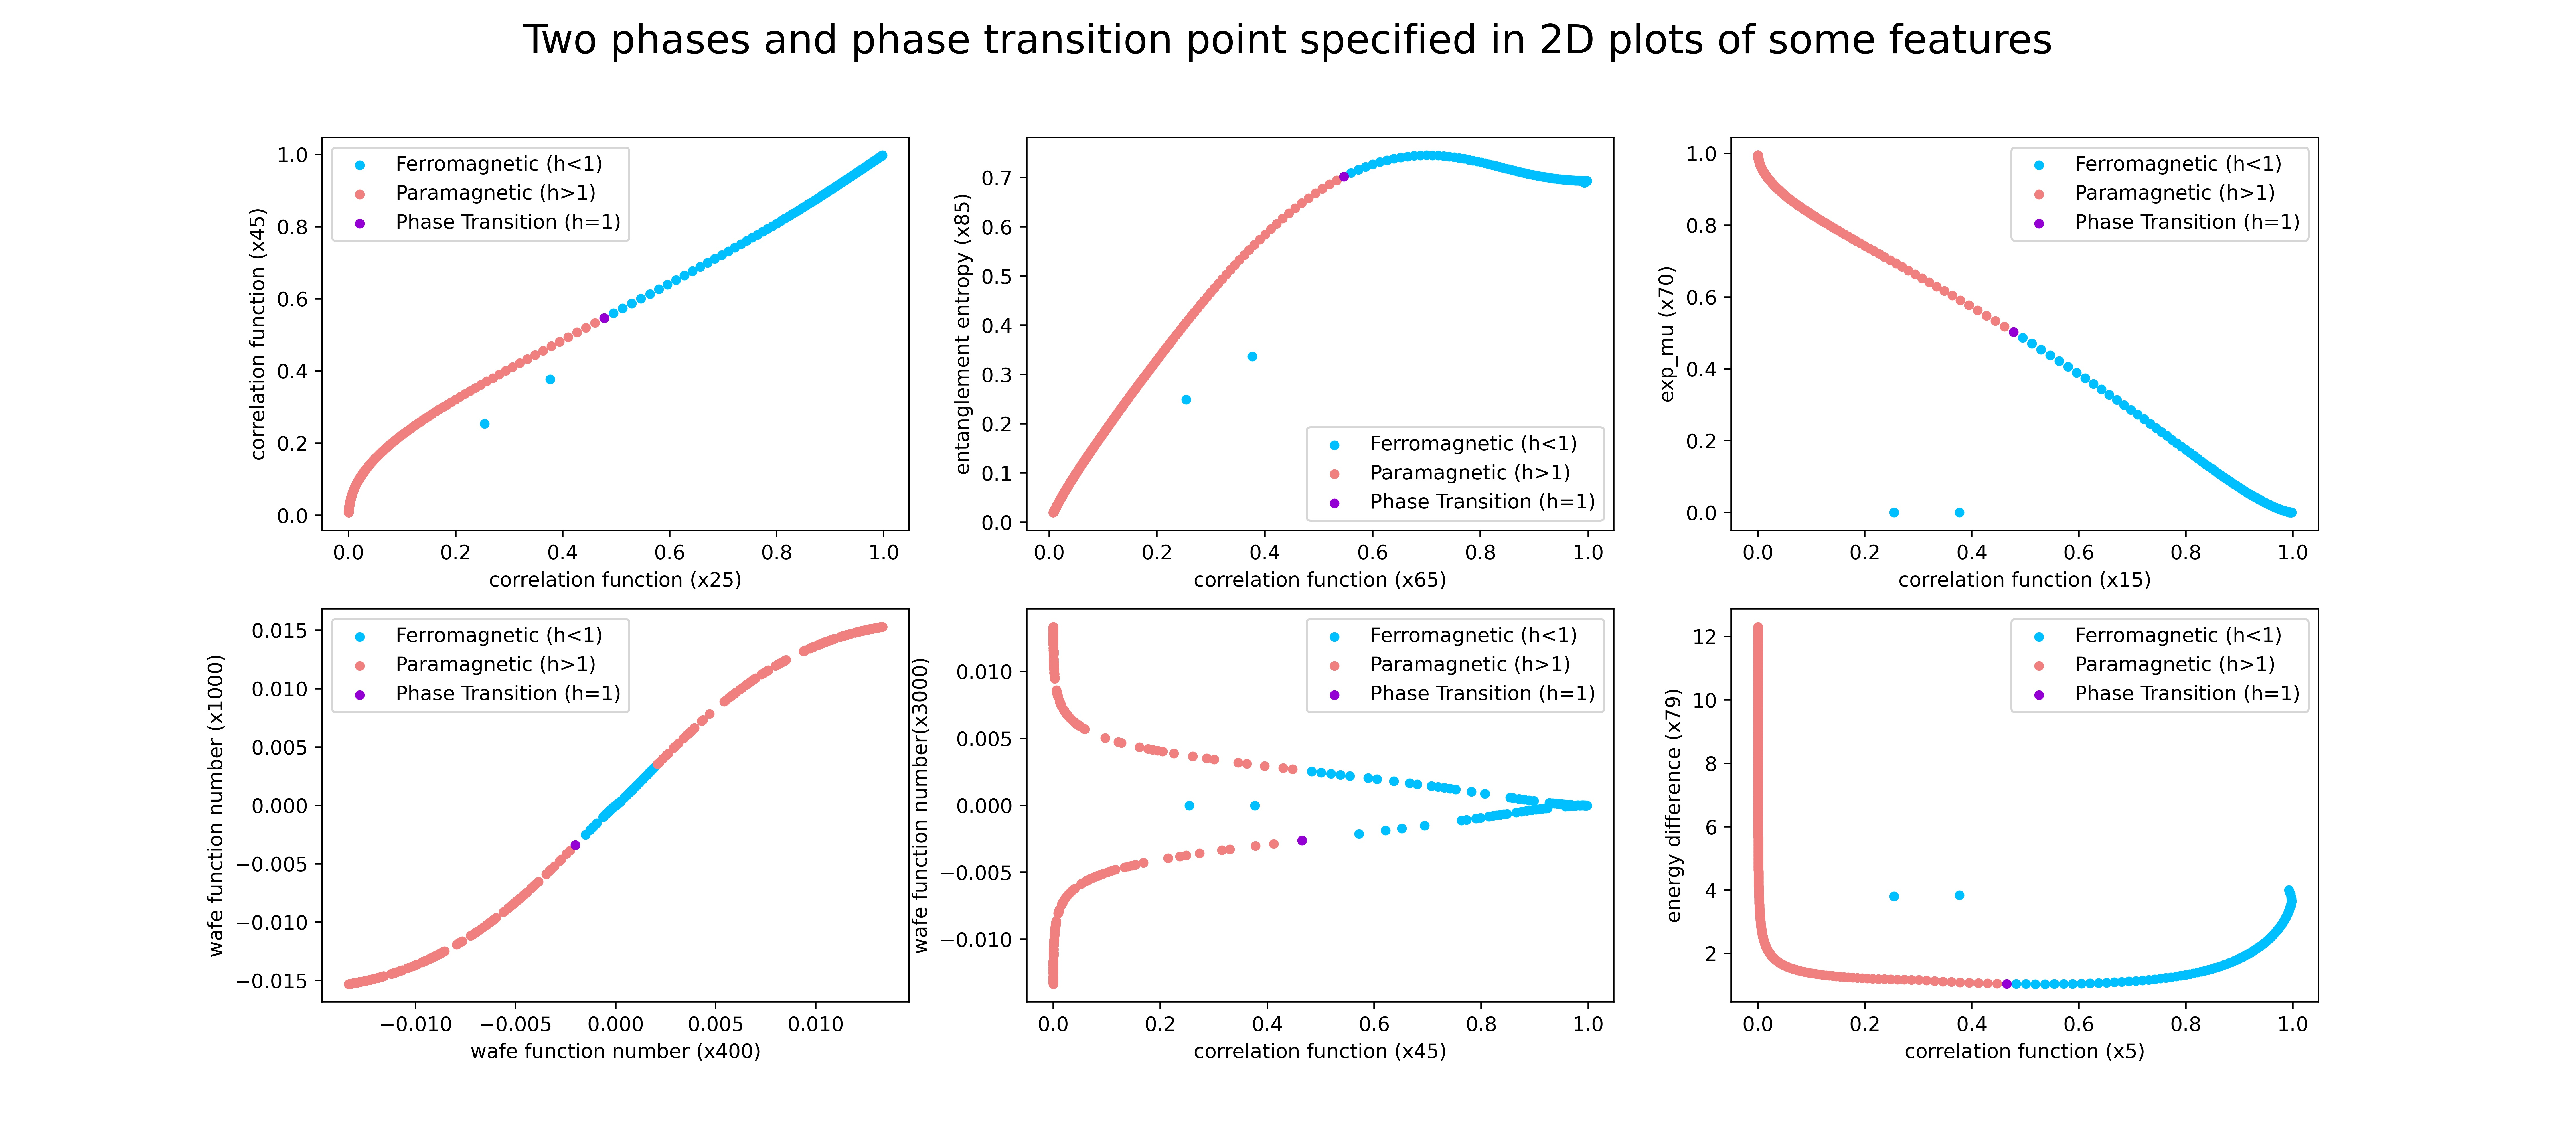

# **Feedforward Neural Network**


# All hidden layers Relu

In [40]:
from tensorflow import keras as ks
relu_model = ks.Sequential()
relu_model.add(ks.layers.Dense(20, activation=ks.activations.relu, input_dim =  4186))
relu_model.add(ks.layers.Dense(20, activation=ks.activations.relu))
relu_model.add(ks.layers.Dense(150, activation=ks.activations.relu))
relu_model.add(ks.layers.Dense(200, activation=ks.activations.relu))
relu_model.add(ks.layers.Dense(20, activation=ks.activations.relu))
relu_model.add(ks.layers.Dense(20, activation=ks.activations.relu))
relu_model.add(ks.layers.Dense(1, activation=ks.activations.linear))
relu_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                83740     
_________________________________________________________________
dense_28 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_29 (Dense)             (None, 150)               3150      
_________________________________________________________________
dense_30 (Dense)             (None, 200)               30200     
_________________________________________________________________
dense_31 (Dense)             (None, 20)                4020      
_________________________________________________________________
dense_32 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                

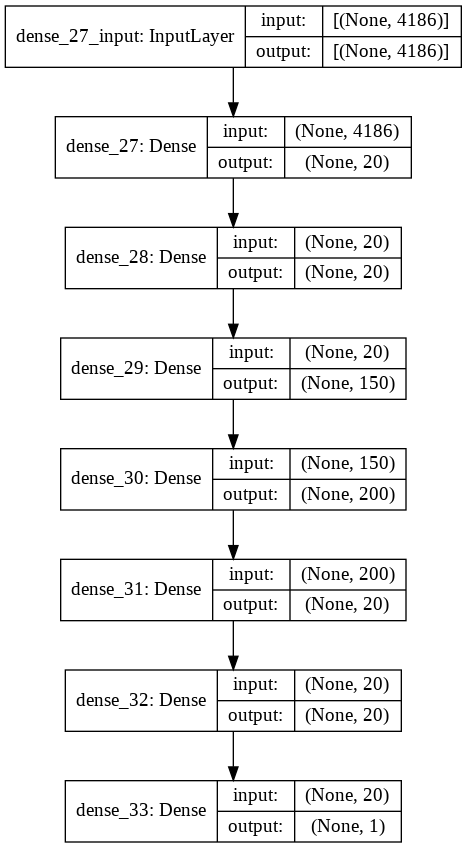

In [41]:
plot_model(relu_model, show_shapes=True,)

# **Training**

In [56]:
%%time
relu_model.compile( loss='mean_squared_error',optimizer='adam',metrics='mse')
history = relu_model.fit(x_train, y_train, epochs=100, batch_size=30,  verbose=1, validation_data = (x_test,y_test))

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 0.1394 - mse: 0.1394 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 4.5254e-04 - val_mse: 4.5254e-04
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 3.9067e-04 - mse: 3.9067e-04 - val_loss: 2.5036e-04 - val_mse: 2.5036e-04
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4898e-04 - mse: 1.4898e-04 - val_loss: 1.2751e-04 - val_mse: 1.2751e-04
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0528e-04 - mse: 1.0528e-04 - val_loss: 1.1980e-04 - val_mse: 1.1980e-04
Epoch 8/100
18/18 [=======

# **Loss vs Epoch Curve**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

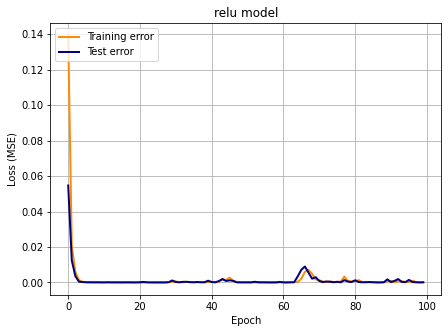

In [57]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],label="Training error",
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],label="Validation error",
             color="navy", lw=lw)
plt.title('relu model')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(["Training error", "Test error"], loc='upper left')
plt.grid()

plt.savefig("relu_curve.jpg",dpi=150)
files.download("relu_curve.jpg") 

# **Evaluation with test data**

In [58]:
%%time
y_pred_relu = relu_model.predict(x_test)

CPU times: user 99.1 ms, sys: 2.99 ms, total: 102 ms
Wall time: 99.9 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

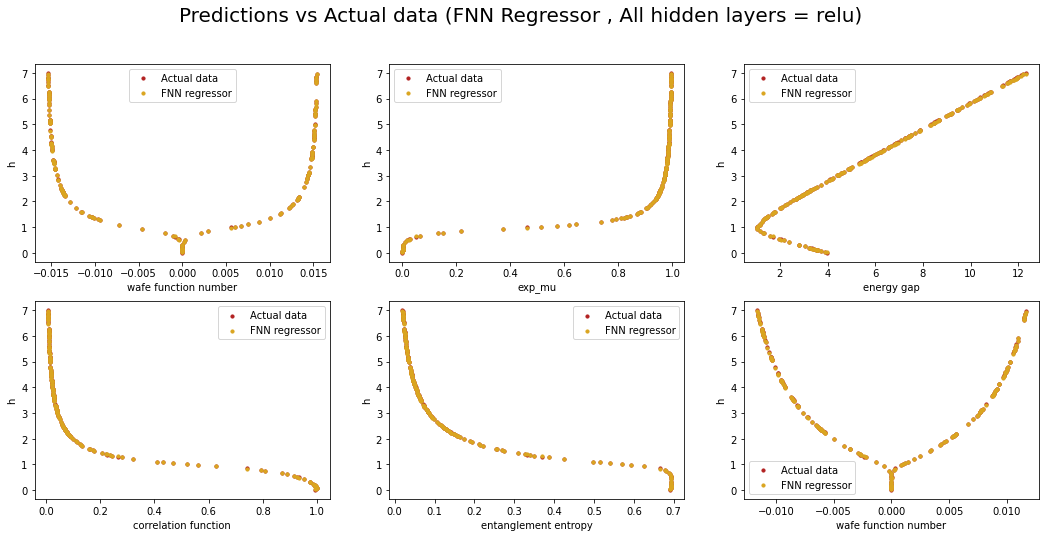

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_relu,s=10, label="FNN regressor", c = 'goldenrod')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_relu,s=10, label="FNN regressor", c = 'goldenrod')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_relu,s=10, label="FNN regressor", c = 'goldenrod')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_relu,s=10, label="FNN regressor", c = 'goldenrod')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_relu,s=10, label="FNN regressor", c = 'goldenrod')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_relu,s=10, label="FNN regressor", c = 'goldenrod')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , All hidden layers = relu)",fontsize = 20)

plt.savefig("relu_pred.jpg",dpi=150)
files.download("relu_pred.jpg") 

**Metrics**

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
##
MSEScore = mean_squared_error(y_test,y_pred_relu)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_relu)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_relu, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_relu)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.00012183916669586884

r^2 metric: 0.9999704151528414

root mean squared_error metric: 0.011038078034507133

mean absolute error metric: 0.008357123866338616


**Phase** **transiotion** **point**

In [61]:
h_phasetransition = (relu_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [1.0086068]


# All hidden layers Tanh

In [48]:
tanh_model = ks.Sequential()
tanh_model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  4186))
tanh_model.add(ks.layers.Dense(30, activation=ks.activations.tanh))
tanh_model.add(ks.layers.Dense(100, activation=ks.activations.tanh))
tanh_model.add(ks.layers.Dense(160, activation=ks.activations.tanh))
tanh_model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
tanh_model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
tanh_model.add(ks.layers.Dense(1, activation=ks.activations.linear))
tanh_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 20)                83740     
_________________________________________________________________
dense_35 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_36 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_37 (Dense)             (None, 160)               16160     
_________________________________________________________________
dense_38 (Dense)             (None, 20)                3220      
_________________________________________________________________
dense_39 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                

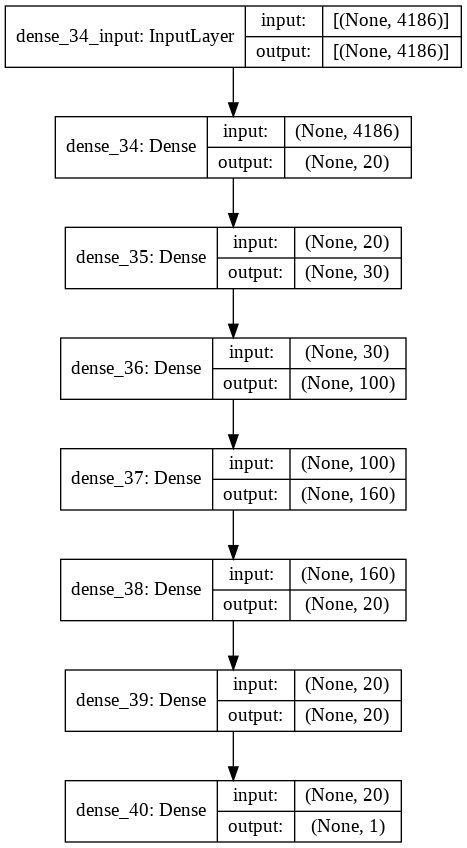

In [49]:
plot_model(tanh_model, show_shapes=True,)

# **Training**

In [62]:
%%time
tanh_model.compile( loss='mean_squared_error',optimizer='adam',metrics='mse')
history = tanh_model.fit(x_train, y_train, epochs=100, batch_size=30,  verbose=1, validation_data = (x_test,y_test))

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 0.1737 - mse: 0.1737 - val_loss: 0.0579 - val_mse: 0.0579
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 8.5259e-04 - mse: 8.5259e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0

# **Loss** **vs** **Epoch**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

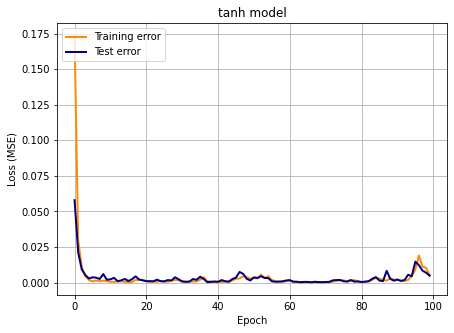

In [63]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('tanh model')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Test error'], loc='upper left')
plt.grid()
plt.savefig("tanh_curve.jpg",dpi=150)
files.download("tanh_curve.jpg") 

# **Evaluation with test data**

In [64]:
%%time
y_pred_tanh = tanh_model.predict(x_test)

CPU times: user 91.2 ms, sys: 1.8 ms, total: 93 ms
Wall time: 102 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

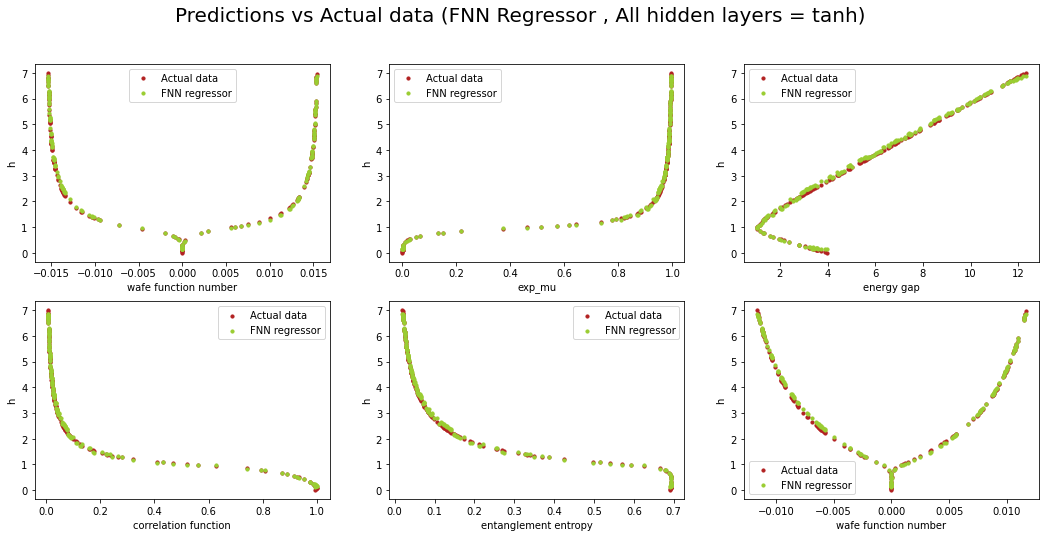

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_tanh,s=10, label="FNN regressor", c = 'yellowgreen')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_tanh,s=10, label="FNN regressor", c = 'yellowgreen')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_tanh,s=10, label="FNN regressor", c = 'yellowgreen')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_tanh,s=10, label="FNN regressor", c = 'yellowgreen')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_tanh,s=10, label="FNN regressor", c = 'yellowgreen')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_tanh,s=10, label="FNN regressor", c = 'yellowgreen')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , All hidden layers = tanh)",fontsize = 20)

plt.savefig("tanh_pred.jpg",dpi=150)
files.download("tanh_pred.jpg") 

**Metrics**

In [66]:
MSEScore = mean_squared_error(y_test,y_pred_tanh)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_tanh)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_tanh, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred_tanh)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.00487457781647466

r^2 metric: 0.9988163605876961

root mean squared_error metric: 0.06981817683436499

mean absolute error metric: 0.05582356723533437


 **Phase** **transition** **point**

In [67]:
h_phasetransition = (tanh_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [1.0151238]


# All hidden layers Softmax

In [24]:
smax_model = ks.Sequential()
smax_model.add(ks.layers.Dense(100, activation=ks.activations.softmax, input_dim =  4186))
smax_model.add(ks.layers.Dense(140, activation=ks.activations.softmax))
smax_model.add(ks.layers.Dense(100, activation=ks.activations.softmax))
smax_model.add(ks.layers.Dense(150, activation=ks.activations.softmax))
smax_model.add(ks.layers.Dense(1, activation=ks.activations.linear))
smax_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               418700    
_________________________________________________________________
dense_15 (Dense)             (None, 140)               14140     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               14100     
_________________________________________________________________
dense_17 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 151       
Total params: 462,241
Trainable params: 462,241
Non-trainable params: 0
_________________________________________________________________


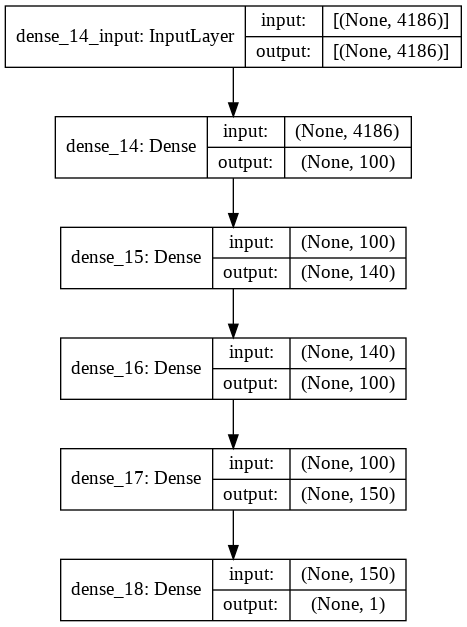

In [25]:
plot_model(smax_model, show_shapes=True,)

# **Training**

In [68]:
%%time
smax_model.compile( loss='mean_squared_error',optimizer='adam',metrics='mse')
history = smax_model.fit(x_train, y_train, epochs=300, batch_size=50,  verbose=1, validation_data = (x_test,y_test))

Epoch 1/300
11/11 [==============================] - 1s 16ms/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.1258 - val_mse: 0.1258
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1017 - mse: 0.1017 - val_loss: 0.1202 - val_mse: 0.1202
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0961 - mse: 0.0961 - val_loss: 0.1152 - val_mse: 0.1152
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0917 - mse: 0.0917 - val_loss: 0.1105 - val_mse: 0.1105
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0874 - mse: 0.0874 - val_loss: 0.1061 - val_mse: 0.1061
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.1027 - val_mse: 0.1027
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0798 - mse: 0.0798 - val_loss: 0.0986 - val_mse: 0.0986
Epoch 8/300
11/11 [==============================] - 0s 6ms/step - loss: 0.0765 - 

## **Loss** **vs** **Epoch** **Curve**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

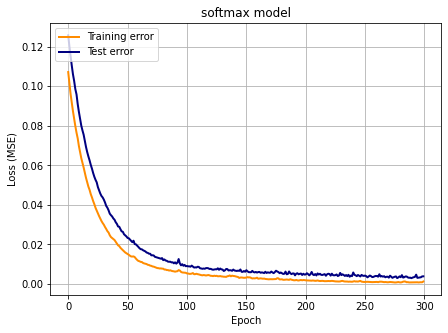

In [69]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('softmax model')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Test error'], loc='upper left')
plt.grid()

plt.savefig("softmax_curve.jpg",dpi=150)
files.download("softmax_curve.jpg") 

# **Evaluation with test data**

In [70]:
%%time
y_pred_smax = smax_model.predict(x_test)

CPU times: user 75.4 ms, sys: 6.02 ms, total: 81.5 ms
Wall time: 88.5 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

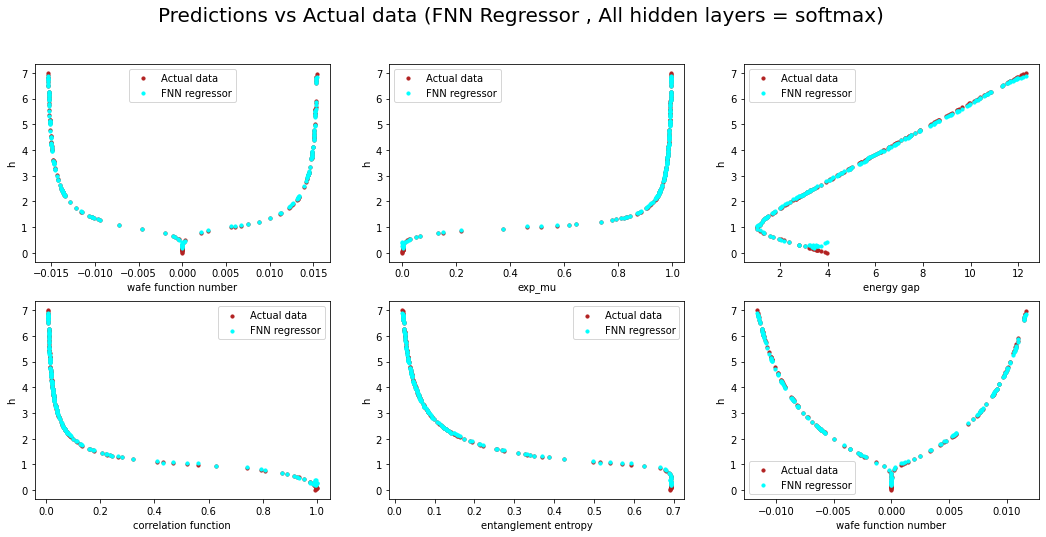

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_smax,s=10, label="FNN regressor", c = 'cyan')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_smax,s=10, label="FNN regressor", c = 'cyan')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_smax,s=10, label="FNN regressor", c = 'cyan')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_smax,s=10, label="FNN regressor", c = 'cyan')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_smax,s=10, label="FNN regressor", c = 'cyan')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_smax,s=10, label="FNN regressor", c = 'cyan')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , All hidden layers = softmax)",fontsize = 20)

plt.savefig("smax_pred.jpg",dpi=150)
files.download("smax_pred.jpg") 

**Metrics**

In [72]:
MSEScore = mean_squared_error(y_test,y_pred_smax)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_smax)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_smax, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred_smax)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.003798168290716661

r^2 metric: 0.9990777331180843

root mean squared_error metric: 0.061629281114715766

mean absolute error metric: 0.03549757689237592


**Phase** **transition** **point**

In [73]:
# Phase transition point
h_phasetransition = (smax_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [0.98820513]


# **Different acticvation functions**

In [32]:
model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  4186))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.softsign))
model.add(ks.layers.Dense(209, activation=ks.activations.softmax))
model.add(ks.layers.Dense(211, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(1, activation=ks.activations.linear))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                83740     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_22 (Dense)             (None, 209)               4389      
_________________________________________________________________
dense_23 (Dense)             (None, 211)               44310     
_________________________________________________________________
dense_24 (Dense)             (None, 20)                4240      
_________________________________________________________________
dense_25 (Dense)             (None, 20)               

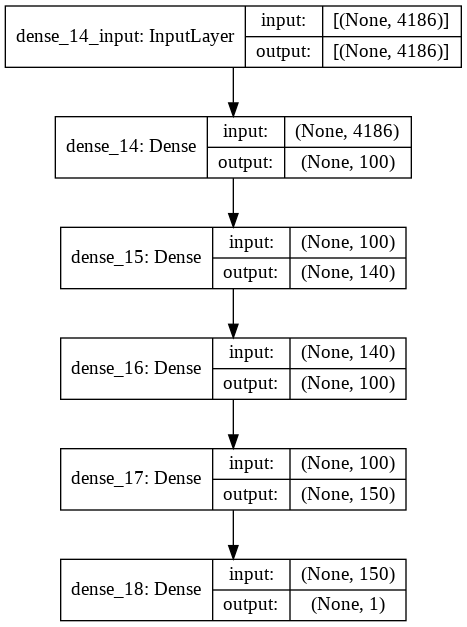

In [33]:
plot_model(smax_model, show_shapes=True,)

# **Training**

In [76]:
%%time
model.compile( loss='mean_squared_error',optimizer='adam',metrics='mse')
history = model.fit(x_train, y_train, epochs=200, batch_size=30,  verbose=1, validation_data = (x_test,y_test))

Epoch 1/200
18/18 [==============================] - 1s 11ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 8.5231e-04 - mse: 8.5231e-04 - val_loss: 4.8687e-04 - val_mse: 4.8687e-04
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 2.2406e-04 - mse: 2.2406e-04 - val_loss: 2.7934e-04 - val_mse: 2.7934e-04
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 1.1966e-04 - mse: 1.1966e-04 - val_loss: 2.1632e-04 - val_mse: 2.1632e-04
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 7.0856e-05 - mse: 7.0856e-05 - val_loss: 1.7619e-04 - val_mse: 1.7619e-04
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 6.7615e-05 - mse: 6.7615e-05 - val_loss: 1.5892e-04 - val_mse: 1.5892e-04
Ep

# **Loss vs Epoch Curve**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

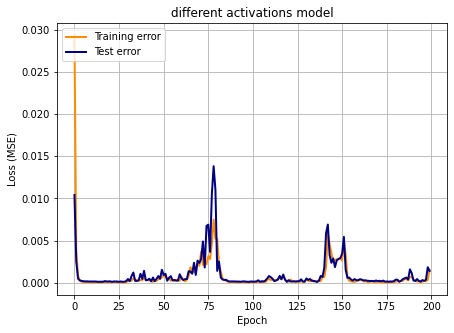

In [77]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('different activations model')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Test error'], loc='upper left')
plt.grid()

plt.savefig("mix_curve.jpg",dpi=150)
files.download("mix_curve.jpg") 

In [78]:
%%time
y_pred = model.predict(x_test)

CPU times: user 87.9 ms, sys: 3.76 ms, total: 91.7 ms
Wall time: 103 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

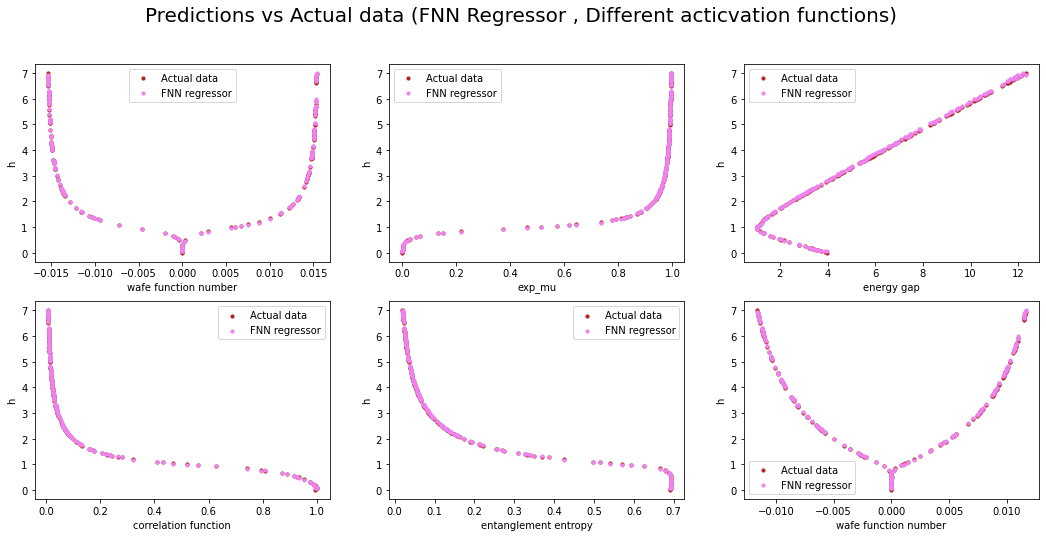

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'violet')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'violet')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'violet')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'violet')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'violet')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'violet')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , Different acticvation functions)",fontsize = 20)

plt.savefig("mix_pred.jpg",dpi=150)
files.download("mix_pred.jpg") 

**Metics**

In [80]:
MSEScore = mean_squared_error(y_test,y_pred)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.001398950509765246

r^2 metric: 0.9996603084366353

root mean squared_error metric: 0.03740254683527909

mean absolute error metric: 0.03137471444735474


**Phase** **transition** **point**

In [81]:
# Phase transition point
h_phasetransition = (model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [1.0114075]


# **Tuning**

In [82]:
!pip install -q -U keras-tuner
import kerastuner as kt

In [83]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def model_fnn(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=20,
                                            max_value=220,
                                            step=10),
                               activation=hp.Choice('act_'+ str(i), ['relu','softmax','tanh',])))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',values = [0.1,0.01,0.001])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

# RandomSearch Optimization

In [85]:
tuner = RandomSearch(
    model_fnn,
    objective='val_mean_squared_error',
    max_trials=4,
    executions_per_trial=3,
    directory='ml_project')

In [86]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [87]:
tuner.search(x_train, y_train,
             epochs=150,
             batch_size = 30,
             validation_data=(x_test, y_test))

Trial 4 Complete [00h 00m 50s]
val_mean_squared_error: 4.118367989857991

Best val_mean_squared_error So Far: 8.378635599607757e-05
Total elapsed time: 00h 03m 13s
INFO:tensorflow:Oracle triggered exit


In [88]:
tuner.results_summary()

Results summary
Results in ml_project/untitled_project
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 150
act_0: relu
units_1: 170
act_1: relu
learning_rate: 0.01
units_2: 20
act_2: relu
units_3: 20
act_3: relu
units_4: 20
act_4: relu
Score: 8.378635599607757e-05
Trial summary
Hyperparameters:
num_layers: 2
units_0: 70
act_0: relu
units_1: 200
act_1: relu
learning_rate: 0.001
units_2: 120
act_2: softmax
units_3: 210
act_3: relu
units_4: 140
act_4: relu
Score: 0.0002065757459301191
Trial summary
Hyperparameters:
num_layers: 2
units_0: 190
act_0: relu
units_1: 140
act_1: softmax
learning_rate: 0.01
units_2: 100
act_2: softmax
units_3: 70
act_3: softmax
units_4: 40
act_4: softmax
Score: 1.5678682525952656
Trial summary
Hyperparameters:
num_layers: 5
units_0: 110
act_0: softmax
units_1: 120
act_1: relu
learning_rate: 0.01
units_2: 190
act_2: relu
units_3: 90
act_3: tanh
units_4: 150
act_4: softmax
Score

In [97]:
%%time
bestrs_model = tuner.get_best_models()[0]
history = bestrs_model.fit(x_train, y_train, epochs=250, batch_size=30,  verbose=1, validation_data = (x_test,y_test))

Epoch 1/250
18/18 [==============================] - 1s 11ms/step - loss: 1.2127e-05 - mean_squared_error: 1.2127e-05 - val_loss: 2.6731e-05 - val_mean_squared_error: 2.6731e-05
Epoch 2/250
18/18 [==============================] - 0s 4ms/step - loss: 1.3856e-05 - mean_squared_error: 1.3856e-05 - val_loss: 2.4384e-05 - val_mean_squared_error: 2.4384e-05
Epoch 3/250
18/18 [==============================] - 0s 4ms/step - loss: 1.4040e-05 - mean_squared_error: 1.4040e-05 - val_loss: 2.8040e-05 - val_mean_squared_error: 2.8040e-05
Epoch 4/250
18/18 [==============================] - 0s 4ms/step - loss: 2.2660e-05 - mean_squared_error: 2.2660e-05 - val_loss: 7.9194e-05 - val_mean_squared_error: 7.9194e-05
Epoch 5/250
18/18 [==============================] - 0s 4ms/step - loss: 3.5400e-05 - mean_squared_error: 3.5400e-05 - val_loss: 1.1377e-04 - val_mean_squared_error: 1.1377e-04
Epoch 6/250
18/18 [==============================] - 0s 4ms/step - loss: 5.4926e-04 - mean_squared_error: 5.4926e-

# **Loss vs Epoch Curve**

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

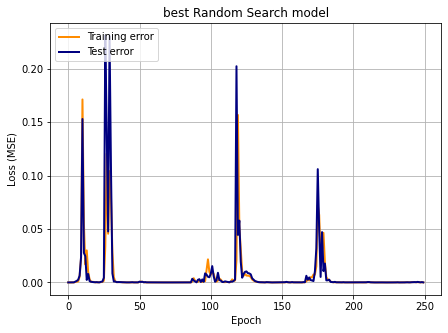

In [98]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('best Random Search model')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Test error'], loc='upper left')
plt.grid()

plt.savefig("randsearch_curve.jpg",dpi=150)
files.download("randsearch_curve.jpg") 

In [99]:
%%time
y_pred = bestrs_model.predict(x_test)

CPU times: user 84.6 ms, sys: 4 ms, total: 88.6 ms
Wall time: 88.4 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

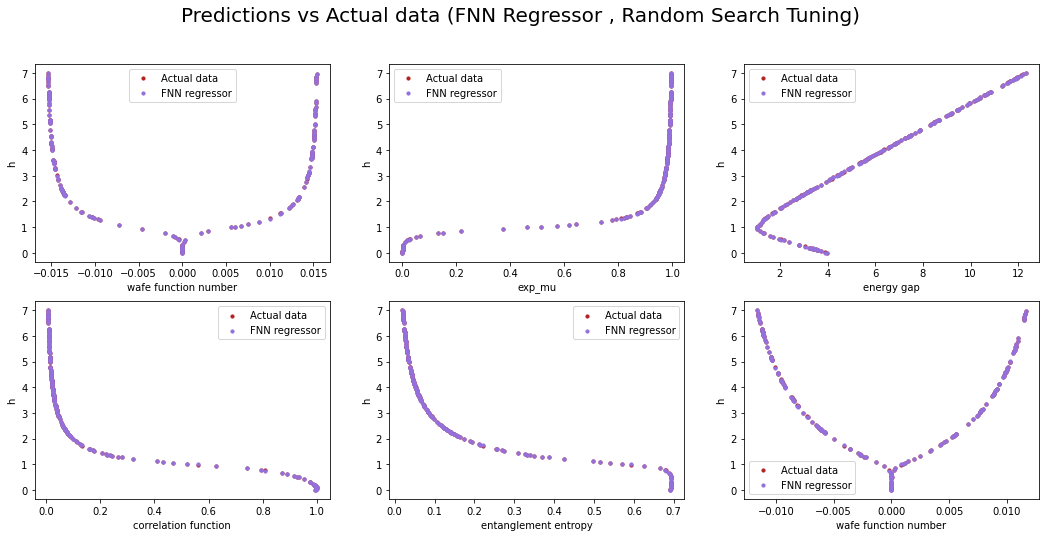

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'mediumpurple')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'mediumpurple')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'mediumpurple')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'mediumpurple')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'mediumpurple')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'mediumpurple')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , Random Search Tuning)",fontsize = 20)

plt.savefig("randsearch_pred.jpg",dpi=150)
files.download("randsearch_pred.jpg") 

In [101]:
MSEScore = mean_squared_error(y_test,y_pred)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 4.749714089693213e-05

r^2 metric: 0.9999884667985508

root mean squared_error metric: 0.006891816951786527

mean absolute error metric: 0.005245922861451438


In [102]:
# Phase transition point
h_phasetransition = (bestrs_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [0.99205726]


# Bayesian Optimization

In [103]:
from kerastuner.tuners import BayesianOptimization
tuner = BayesianOptimization(
    model_fnn,
    objective='val_mean_squared_error',
    max_trials=4,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    overwrite=True,
)

In [104]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [105]:
tuner.search(x_train, y_train,
             epochs=150,
             batch_size = 30,
             validation_data=(x_test, y_test))

Trial 4 Complete [00h 00m 40s]
val_mean_squared_error: 1.1041407585144043

Best val_mean_squared_error So Far: 0.00016432759002782404
Total elapsed time: 00h 01m 48s
INFO:tensorflow:Oracle triggered exit


In [106]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 200
act_0: tanh
units_1: 180
act_1: relu
learning_rate: 0.001
units_2: 30
act_2: tanh
units_3: 110
act_3: softmax
units_4: 200
act_4: tanh
Score: 0.00016432759002782404
Trial summary
Hyperparameters:
num_layers: 5
units_0: 170
act_0: tanh
units_1: 60
act_1: tanh
learning_rate: 0.01
units_2: 20
act_2: relu
units_3: 20
act_3: relu
units_4: 20
act_4: relu
Score: 0.00017150485655292869
Trial summary
Hyperparameters:
num_layers: 2
units_0: 220
act_0: tanh
units_1: 20
act_1: softmax
learning_rate: 0.001
units_2: 20
act_2: softmax
units_3: 20
act_3: tanh
units_4: 220
act_4: softmax
units_5: 20
act_5: relu
units_6: 20
act_6: relu
Score: 1.1041407585144043
Trial summary
Hyperparameters:
num_layers: 7
units_0: 140
act_0: softmax
units_1: 220
act_1: relu
learning_rate: 0.1
units_2: 170
act_2: tanh
units_3: 180
act_3: r

In [107]:
%%time
bestbo_model = tuner.get_best_models()[0]
history = bestbo_model.fit(x_train, y_train, epochs=150, batch_size=30,  verbose=1, validation_data = (x_test,y_test))

Epoch 1/150
18/18 [==============================] - 1s 12ms/step - loss: 1.9340e-04 - mean_squared_error: 1.9340e-04 - val_loss: 2.8186e-04 - val_mean_squared_error: 2.8186e-04
Epoch 2/150
18/18 [==============================] - 0s 5ms/step - loss: 2.7525e-04 - mean_squared_error: 2.7525e-04 - val_loss: 2.9398e-04 - val_mean_squared_error: 2.9398e-04
Epoch 3/150
18/18 [==============================] - 0s 5ms/step - loss: 3.4528e-04 - mean_squared_error: 3.4528e-04 - val_loss: 3.5422e-04 - val_mean_squared_error: 3.5422e-04
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 3.3754e-04 - mean_squared_error: 3.3754e-04 - val_loss: 2.0423e-04 - val_mean_squared_error: 2.0423e-04
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 2.8754e-04 - mean_squared_error: 2.8754e-04 - val_loss: 2.1358e-04 - val_mean_squared_error: 2.1358e-04
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 2.8596e-04 - mean_squared_error: 2.8596e-

# **Loss vs Epoch Curve**

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

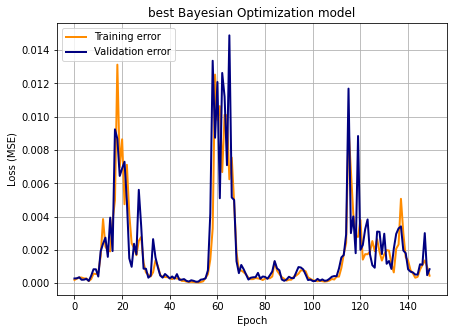

In [108]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('best Bayesian Optimization model')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Validation error'], loc='upper left')
plt.grid()

plt.savefig("Bayesianop_curve.jpg",dpi=150)
files.download("Bayesianop_curve.jpg") 

In [109]:
%%time
y_pred = bestbo_model.predict(x_test)

CPU times: user 83.3 ms, sys: 521 µs, total: 83.8 ms
Wall time: 95.2 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

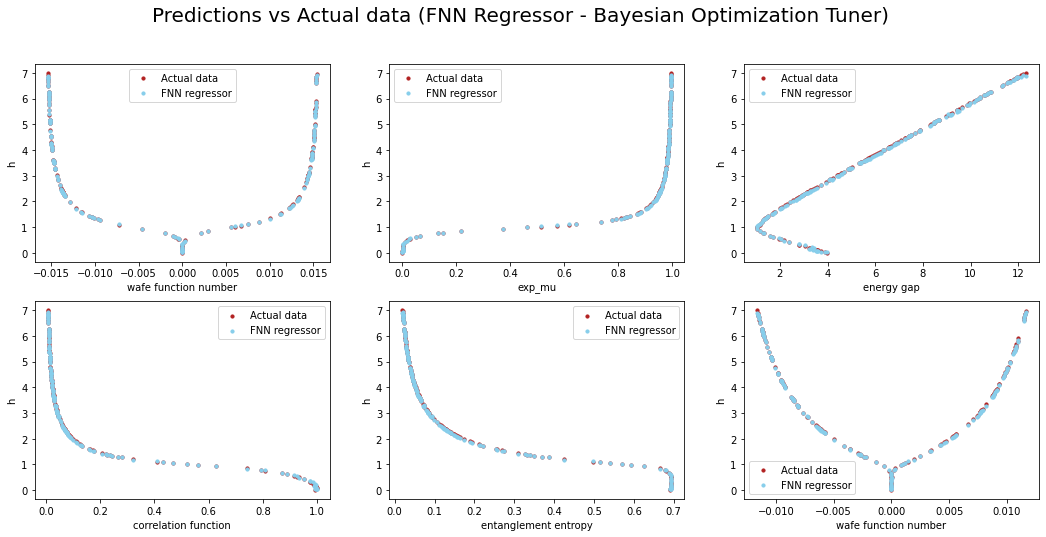

In [110]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'skyblue')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'skyblue')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'skyblue')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'skyblue')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'skyblue')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'skyblue')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor - Bayesian Optimization Tuner)",fontsize = 20)

plt.savefig("Bayesianop_pred.jpg",dpi=150)
files.download("Bayesianop_pred.jpg") 

In [111]:
MSEScore = mean_squared_error(y_test,y_pred)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.0008399375375726985

r^2 metric: 0.999796047327425

root mean squared_error metric: 0.028981675893100082

mean absolute error metric: 0.022769288704307226


In [112]:
# Phase transition point
h_phasetransition = (bestbo_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [1.0023328]


# Hyperband Optimization 

 **Only two layer neural network**

# dense layer activation function = tanh

In [113]:
def model_builder(hp):
  model = ks.Sequential()
  model.add(ks.layers.Dense(10, activation=ks.activations.tanh, input_dim =  4186)  )

  hp_units = hp.Int('units', min_value=10, max_value=220, step=10)
  model.add(ks.layers.Dense(units=hp_units, 
                               activation=ks.activations.tanh, 
                               kernel_regularizer=ks.regularizers.l2(.05)))
  model.add(ks.layers.Dense(1, activation=ks.activations.linear ))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])

  model.compile(optimizer=ks.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=ks.losses.mean_squared_error,
                metrics=['mse'])

  return model

In [114]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=150,
                     factor=3,
                     directory='my_dir',
                     project_name='ml project')

In [117]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [118]:
tuner.search(x_train, y_train, 
             epochs=150, 
             batch_size = 30, 
             validation_data = (x_test,y_test),
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 63 Complete [00h 00m 00s]
val_loss: 6.947619438171387

Best val_loss So Far: 0.6296402812004089
Total elapsed time: 00h 01m 01s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 140 and the optimal learning rate for the optimizer
is 0.01.



In [119]:
%%time
besthp_model = tuner.hypermodel.build(best_hps)
history = besthp_model.fit(x_train, y_train, 
                    epochs=150, 
                    batch_size = 30, 
                    validation_data=(x_test, y_test))

Epoch 1/150
18/18 [==============================] - 0s 9ms/step - loss: 4.6686 - mse: 3.7882 - val_loss: 1.2104 - val_mse: 0.4588
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 0.8981 - mse: 0.2342 - val_loss: 0.6717 - val_mse: 0.1317
Epoch 3/150
18/18 [==============================] - 0s 3ms/step - loss: 0.5391 - mse: 0.0959 - val_loss: 0.3879 - val_mse: 0.0416
Epoch 4/150
18/18 [==============================] - 0s 5ms/step - loss: 0.3171 - mse: 0.0336 - val_loss: 0.2524 - val_mse: 0.0315
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2132 - mse: 0.0286 - val_loss: 0.1916 - val_mse: 0.0448
Epoch 6/150
18/18 [==============================] - 0s 3ms/step - loss: 0.1613 - mse: 0.0341 - val_loss: 0.1944 - val_mse: 0.0857
Epoch 7/150
18/18 [==============================] - 0s 5ms/step - loss: 0.1582 - mse: 0.0668 - val_loss: 0.1078 - val_mse: 0.0291
Epoch 8/150
18/18 [==============================] - 0s 3ms/step - loss: 0.1165 - m

# **Loss vs Epoch Curve**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

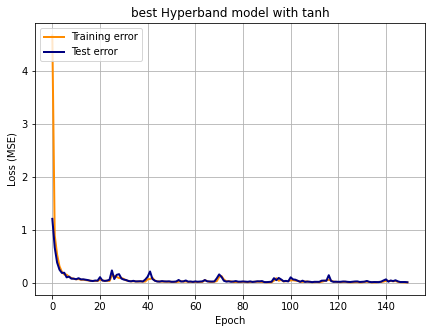

In [120]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('best Hyperband model with tanh')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Test error'], loc='upper left')
plt.grid()

plt.savefig("hyptanh_curve.jpg",dpi=150)
files.download("hyptanh_curve.jpg") 

In [121]:
%%time
y_pred = besthp_model.predict(x_test)

CPU times: user 66.6 ms, sys: 3.03 ms, total: 69.6 ms
Wall time: 67.2 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

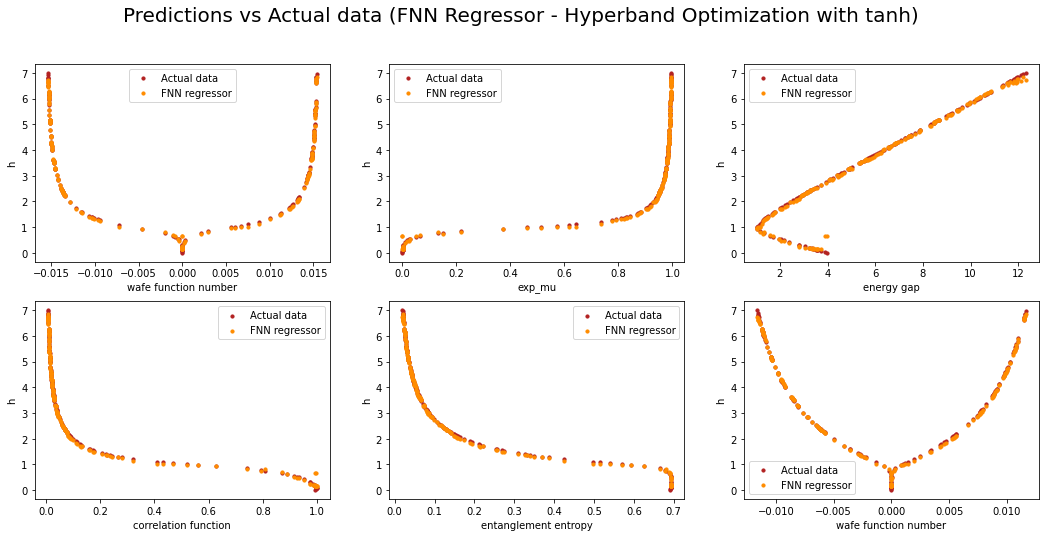

In [122]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'darkorange')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'darkorange')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'darkorange')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'darkorange')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'darkorange')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'darkorange')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor - Hyperband Optimization with tanh)",fontsize = 20)

plt.savefig("hyptanh_pred.jpg",dpi=150)
files.download("hyptanh_pred.jpg") 

In [123]:
MSEScore = mean_squared_error(y_test,y_pred)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.007736299799169213

r^2 metric: 0.9981214805276576

root mean squared_error metric: 0.087956237977583

mean absolute error metric: 0.04595499991015957


In [124]:
# Phase transition point
h_phasetransition = (besthp_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [0.9541176]


# dense layer activation function = relu

In [125]:
def model_builder(hp):
  model = ks.Sequential()
  model.add(ks.layers.Dense(10, activation=ks.activations.tanh, input_dim =  4186)  )

  hp_units = hp.Int('units', min_value=10, max_value=220, step=10)
  model.add(ks.layers.Dense(units=hp_units, 
                               activation=ks.activations.relu, 
                               kernel_regularizer=ks.regularizers.l2(.05)))
  model.add(ks.layers.Dense(1, activation=ks.activations.linear ))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])

  model.compile(optimizer=ks.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=ks.losses.mean_squared_error,
                metrics=['mse'])

  return model

In [126]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=150,
                     factor=3,
                     directory='my_dic',
                     project_name='ml project2')

In [127]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [128]:
tuner.search(x_train, y_train, 
             epochs=150, 
             batch_size = 30, 
             validation_data = (x_test,y_test),
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 61 Complete [00h 00m 00s]
val_loss: 2.7672383785247803

Best val_loss So Far: 0.5125584006309509
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 200 and the optimal learning rate for the optimizer
is 0.01.



In [129]:
%%time
besthp_model = tuner.hypermodel.build(best_hps)
history = besthp_model.fit(x_train, y_train, 
                    epochs=150, 
                    batch_size = 30, 
                    validation_data=(x_test, y_test))

Epoch 1/150
18/18 [==============================] - 0s 10ms/step - loss: 5.8290 - mse: 4.9749 - val_loss: 2.3531 - val_mse: 1.5628
Epoch 2/150
18/18 [==============================] - 0s 3ms/step - loss: 1.6231 - mse: 0.8826 - val_loss: 1.0182 - val_mse: 0.3567
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 0.7447 - mse: 0.1645 - val_loss: 0.5585 - val_mse: 0.0748
Epoch 4/150
18/18 [==============================] - 0s 3ms/step - loss: 0.4563 - mse: 0.0438 - val_loss: 0.3957 - val_mse: 0.0604
Epoch 5/150
18/18 [==============================] - 0s 3ms/step - loss: 0.3311 - mse: 0.0419 - val_loss: 0.2909 - val_mse: 0.0472
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2574 - mse: 0.0411 - val_loss: 0.2431 - val_mse: 0.0528
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2043 - mse: 0.0300 - val_loss: 0.1906 - val_mse: 0.0358
Epoch 8/150
18/18 [==============================] - 0s 4ms/step - loss: 0.1675 - 

# **Loss vs Epoch Curve**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

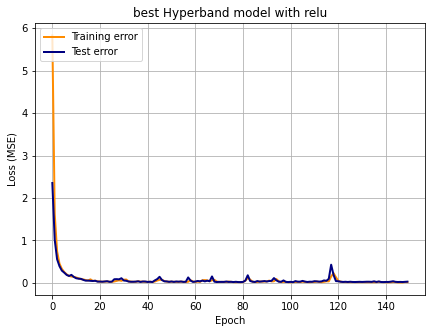

In [130]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('best Hyperband model with relu')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Test error'], loc='upper left')
plt.grid()

plt.savefig("hyprelu_curve.jpg",dpi=150)
files.download("hyprelu_curve.jpg") 

In [131]:
%%time
y_pred = besthp_model.predict(x_test)

CPU times: user 65.4 ms, sys: 2.75 ms, total: 68.2 ms
Wall time: 77.8 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

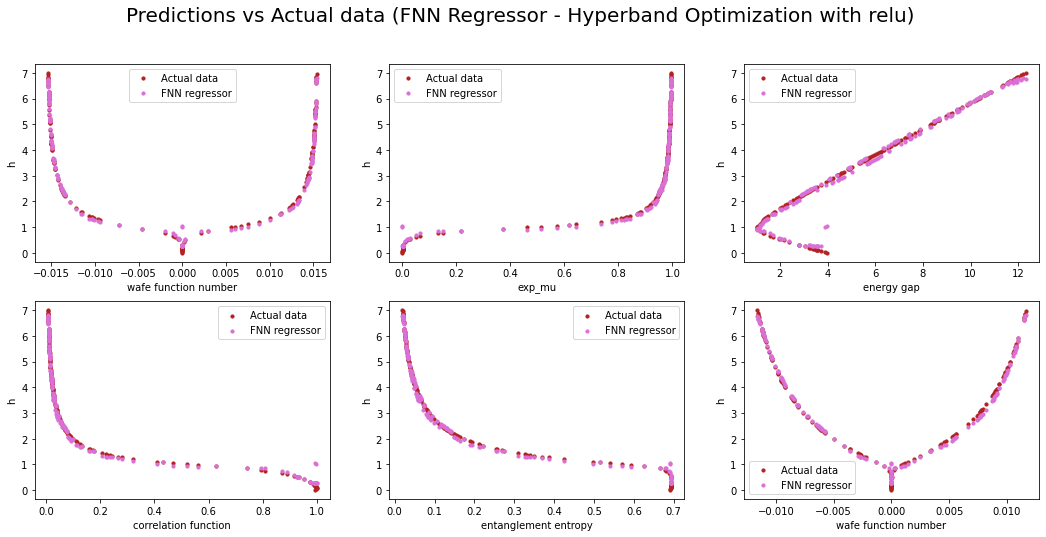

In [132]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'orchid')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'orchid')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'orchid')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'orchid')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'orchid')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'orchid')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor - Hyperband Optimization with relu)",fontsize = 20)

plt.savefig("hyprelu_pred.jpg",dpi=150)
files.download("hyprelu_pred.jpg") 

In [133]:
MSEScore = mean_squared_error(y_test,y_pred)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.021316337432707222

r^2 metric: 0.9948239913155045

root mean squared_error metric: 0.14600115558688986

mean absolute error metric: 0.09413340741260488


In [134]:
# Phase transition point
h_phasetransition = (besthp_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [1.0305703]


# dense layer activation function = sotmax

In [135]:
def model_builder(hp):
  model = ks.Sequential()
  model.add(ks.layers.Dense(10, activation=ks.activations.tanh, input_dim =  4186)  )

  hp_units = hp.Int('units', min_value=10, max_value=220, step=10)
  model.add(ks.layers.Dense(units=hp_units, 
                               activation=ks.activations.softmax, 
                               kernel_regularizer=ks.regularizers.l2(.05)))
  model.add(ks.layers.Dense(1, activation=ks.activations.linear ))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])

  model.compile(optimizer=ks.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=ks.losses.mean_squared_error,
                metrics=['mse'])

  return model

In [137]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=150,
                     factor=3,
                     directory='my_dicr',
                     project_name='ml project3')

In [138]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [139]:
tuner.search(x_train, y_train, 
             epochs=150, 
             batch_size = 30, 
             validation_data = (x_test,y_test),
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 63 Complete [00h 00m 00s]
val_loss: 4.18341064453125

Best val_loss So Far: 2.504847764968872
Total elapsed time: 00h 00m 55s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 90 and the optimal learning rate for the optimizer
is 0.1.



In [ ]:
%%time
besthp_model = tuner.hypermodel.build(best_hps)
history = besthp_model.fit(x_train, y_train, 
                    epochs=150, 
                    batch_size = 30, 
                    validation_data=(x_test, y_test))

Epoch 1/150
18/18 [==============================] - 0s 9ms/step - loss: 8.4094 - mse: 7.9219 - val_loss: 4.0698 - val_mse: 3.8048
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 3.7979 - mse: 3.4630 - val_loss: 3.1631 - val_mse: 2.7956
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 3.3851 - mse: 2.9403 - val_loss: 3.3992 - val_mse: 2.9579
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 2.9865 - mse: 2.4917 - val_loss: 2.6896 - val_mse: 2.1007
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 2.1611 - mse: 1.6921 - val_loss: 2.1515 - val_mse: 1.8224
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 1.8083 - mse: 1.5142 - val_loss: 2.1273 - val_mse: 1.8820
Epoch 7/150
18/18 [==============================] - 0s 5ms/step - loss: 1.6454 - mse: 1.3994 - val_loss: 1.8287 - val_mse: 1.6382
Epoch 8/150
18/18 [==============================] - 0s 4ms/step - loss: 1.4493 - m

# **Loss** **vs** **Epoch** **Curve**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

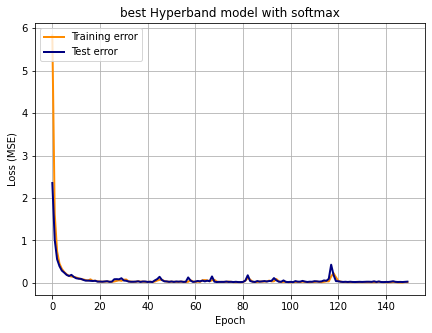

In [140]:
plt.figure(figsize=(7, 5))
lw = 2
print(history.history.keys())
plt.plot(history.history['loss'],
             color="darkorange", lw=lw)
plt.plot(history.history['val_loss'],
             color="navy", lw=lw)
plt.title('best Hyperband model with softmax')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training error', 'Test error'], loc='upper left')
plt.grid()

plt.savefig("hypsmax_curve.jpg",dpi=150)
files.download("hypsmax_curve.jpg") 

In [141]:
%%time
y_pred = besthp_model.predict(x_test)

CPU times: user 44.8 ms, sys: 4.08 ms, total: 48.9 ms
Wall time: 48.4 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

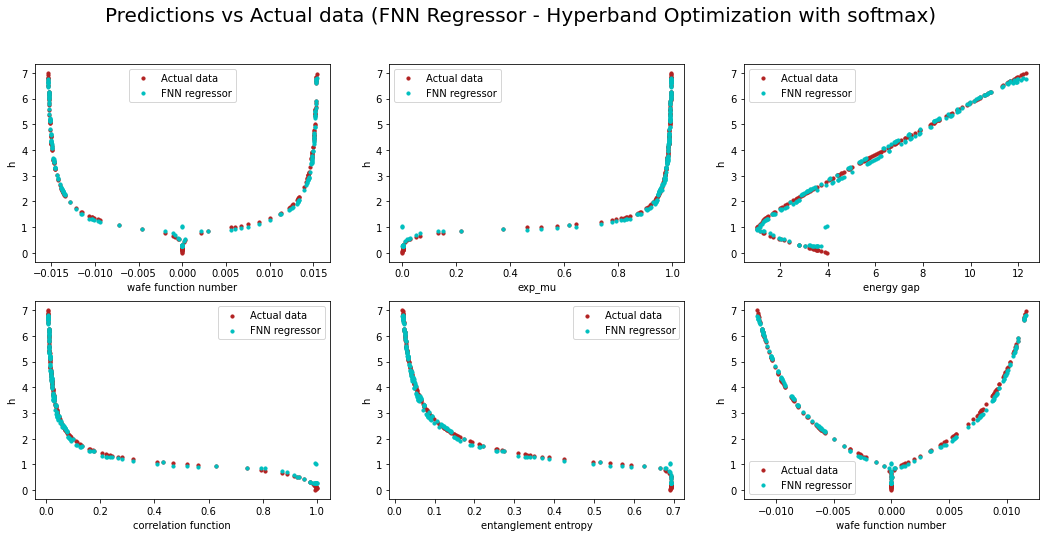

In [142]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'c')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'c')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'c')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'c')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'c')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'c')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor - Hyperband Optimization with softmax)",fontsize = 20)
plt.savefig("hypsmax_pred.jpg",dpi=150)
files.download("hypsmax_pred.jpg") 

In [143]:
MSEScore = mean_squared_error(y_test,y_pred)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test,y_pred)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.021316337432707222

r^2 metric: 0.9948239913155045

root mean squared_error metric: 0.14600115558688986

mean absolute error metric: 0.09413340741260488


In [144]:
# Phase transition point
h_phasetransition = (besthp_model.predict(x))[100]
print(f"phase transition point prediction: {h_phasetransition}")

phase transition point prediction: [1.0305703]


**The** **End** **!**
